Benjamin Osvaldo Alvirde Melendez  


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(context='notebook')

#
import warnings
warnings.filterwarnings('ignore')

In [2]:
mortalidad_2022 = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/conjunto_de_datos_defunciones_registradas_2022.CSV', 
                      encoding = 'latin1')

mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax
0,1,1,15,1,1,1,15,1,1,1,...,15,12,2021,NaN,88,888,8888,0,1001000241,999
1,1,1,15,1,1,1,15,1,1,1,...,99,1,2022,NaN,88,888,8888,0,1001000242,999
2,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,88,888,8888,0,1001001025,999
3,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,88,888,8888,0,1001001026,999
4,1,1,15,1,1,1,15,1,1,1,...,99,2,2022,NaN,1,1,1,0,1001001027,999


In [3]:
entidad = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_estado.csv', 
                      encoding = 'latin1')

entidad.head()

,ent_regis,dc_estado
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila


In [4]:
mortalidad_2022=pd.merge(mortalidad_2022,entidad )

In [5]:
mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,...,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax,dc_estado
0,1,1,15,1,1,1,15,1,1,1,...,12,2021,NaN,88,888,8888,0,1001000241,999,Aguascalientes
1,1,1,15,1,1,1,15,1,1,1,...,1,2022,NaN,88,888,8888,0,1001000242,999,Aguascalientes
2,1,1,15,1,1,1,15,1,1,1,...,2,2022,NaN,88,888,8888,0,1001001025,999,Aguascalientes
3,1,1,15,1,1,1,15,1,1,1,...,2,2022,NaN,88,888,8888,0,1001001026,999,Aguascalientes
4,1,1,15,1,1,1,15,1,1,1,...,2,2022,NaN,1,1,1,0,1001001027,999,Aguascalientes


In [6]:
causa_muerte = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_causas_muerte_2.csv', 
                      encoding = 'latin1')

causa_muerte.head()

,lista_mex,DESCRIP,Causa
0,1,Enfermedades infecciosas intestinales,Enfermedades infecciosas intestinales
1,01A,C??lera,Enfermedades infecciosas intestinales
2,01B,Fiebre tifoidea,Enfermedades infecciosas intestinales
3,01C,Fiebre paratifoidea,Enfermedades infecciosas intestinales
4,01D,Shigelosis,Enfermedades infecciosas intestinales


In [7]:
mortalidad_2022=pd.merge(mortalidad_2022, causa_muerte )

In [8]:
mortalidad_2022['dc_estado'].value_counts()

dc_estado
EDOMEX                 88425
CDMX                   77071
Veracruz               59130
Jalisco                54498
Puebla                 43194
Guanajuato             41543
Nuevo Leon             37155
Michoacan              31430
Chiapas                31036
Oaxaca                 28510
Chihuahua              27656
Baja California        25616
Tamaulipas             21574
Sonora                 21137
Coahuila               20103
San Luis Potosi        19486
Guerrero               19432
Hidalgo                17327
Sinaloa                16861
Morelos                15210
Tabasco                14914
Yucatan                14853
Queretaro              12957
Zacatecas              11690
Durango                10846
Quintana Roo            8459
Aguascalientes          7648
Tlaxcala                7569
Nayarit                 7506
Colima                  5788
Campeche                5260
Baja California Sur     3947
Name: count, dtype: int64

In [9]:
mortalidad_2022['Causa'].value_counts()

Causa
Enfermedades cardiacas                   199414
Diabetes mellitus                        115025
Tumores                                   96175
Enfermedades digestivas                   74631
Infecciones respiratorias                 65874
Otras enfermedades                        55388
Homicidio                                 39240
Enfermedades cerebrovasculares            35977
Otros accidentes                          21036
Accidentes de transporte                  16414
Enfermedades del sistema nervioso         13763
Causas obstetricas                        11083
Enfermedad metabolica                     11054
Enfermedad bacteriana                      9894
Suicidios                                  8253
Malformaciones congenitas                  7958
Desnutricion                               6684
Virus                                      6028
Trastornos mentales                        5130
Enfermedades circulatorias                 4240
Enfermedades infecciosas intestina

In [10]:
pd.set_option('display.max_columns', None)
mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax,dc_estado,DESCRIP,Causa
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
1,1,8,5,1,1,7,1,7777,1,7,1,7777,K255,NaN,35D,2,14,8,8,2,8888,1,998,4084,88,8888,14,12,2021,3,1,2022,13,3,1937,2,110,1,3,4,8,88,88,1,8,8,2,8,8,8,11,3,7,9,9,13,0,11,2,79.0,35,2,21,9,14,12,2021,NaN,88,888,8888,0,1008000161,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
2,1,1,15,1,14,64,2,48,1,5,11,1,K274,NaN,35D,2,1,8,8,2,8888,1,998,4082,88,8888,26,12,2021,12,1,2022,25,12,1939,2,110,4,5,4,8,88,88,1,8,8,9,8,8,8,11,3,99,9,9,18,0,11,2,79.0,35,2,21,9,26,12,2021,NaN,88,888,8888,0,1001000725,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
3,1,1,15,1,1,1,5,479,1,1,15,1,K255,NaN,35D,1,14,8,8,9,8888,1,998,4074,88,8888,2,1,2022,10,1,2022,2,7,1947,2,110,99,5,4,8,88,88,1,8,8,2,8,8,8,3,3,2,8,8,14,22,11,2,79.0,35,1,19,8,2,1,2022,NaN,88,888,8888,0,1001000680,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
4,1,1,15,1,14,91,8,1,1,1,15,1,K254,NaN,35D,1,14,8,8,2,8888,1,998,4077,88,8888,22,12,2021,5,1,2022,19,9,1944,2,110,3,5,4,8,88,88,1,8,8,2,8,8,8,9,1,1,8,8,6,55,11,2,79.0,35,1,20,8,22,12,2021,NaN,88,888,8888,0,1001000289,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas


In [11]:
mortalidad_2022['edad_agru'].value_counts()

edad_agru
21    84432
20    82455
19    77318
22    76684
18    71276
17    63398
16    52925
23    51737
15    42336
14    34213
13    26236
24    22079
12    21499
11    19530
1     19454
10    17781
9     14426
8      9464
30     5308
25     4916
7      3300
6      2296
2      1791
3      1069
4       672
26      571
5       561
27       89
28        8
29        7
Name: count, dtype: int64

In [12]:
mortalidad_2022=mortalidad_2022[['Causa','edad_agru','asist_medi','edo_civil','escolarida','edad','sexo','dc_estado']]

In [13]:
pd.set_option('display.max_columns', None)
mortalidad_2022.head()

,Causa,edad_agru,asist_medi,edo_civil,escolarida,edad,sexo,dc_estado
0,Enfermedades digestivas,22,1,3,3,4089,2,Aguascalientes
1,Enfermedades digestivas,21,1,3,1,4084,2,Aguascalientes
2,Enfermedades digestivas,21,1,5,4,4082,2,Aguascalientes
3,Enfermedades digestivas,19,1,5,99,4074,1,Aguascalientes
4,Enfermedades digestivas,20,1,5,3,4077,1,Aguascalientes


In [14]:
# Creamos las variables binarias
mortalidad_2022 = pd.get_dummies(mortalidad_2022, columns = ['Causa'], drop_first = True)
mortalidad_2022

,edad_agru,asist_medi,edo_civil,escolarida,edad,sexo,dc_estado,Causa_Causas obstetricas,Causa_Desnutricion,Causa_Diabetes mellitus,Causa_Enfermedad bacteriana,Causa_Enfermedad metabolica,Causa_Enfermedades cardiacas,Causa_Enfermedades cerebrovasculares,Causa_Enfermedades circulatorias,Causa_Enfermedades del sistema nervioso,Causa_Enfermedades digestivas,Causa_Enfermedades infecciosas intestinales,Causa_Homicidio,Causa_Infecciones respiratorias,Causa_Infecciones y parasitos,Causa_Malformaciones congenitas,Causa_Otras enfermedades,Causa_Otros accidentes,Causa_Suicidios,Causa_Trastornos mentales,Causa_Tumores,Causa_Virus
0,22,1,3,3,4089,2,Aguascalientes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,21,1,3,1,4084,2,Aguascalientes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,21,1,5,4,4082,2,Aguascalientes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,19,1,5,99,4074,1,Aguascalientes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,20,1,5,3,4077,1,Aguascalientes,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807826,16,1,1,4,4055,1,Quintana Roo,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
807827,11,1,1,8,4031,1,Veracruz,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
807828,16,1,5,9,4058,1,Sonora,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
807829,16,1,5,6,4056,2,Sonora,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [15]:
mortalidad_2022=mortalidad_2022[['Causa_Homicidio','asist_medi','escolarida','edad','sexo','dc_estado']]

In [16]:
mortalidad_2022

,Causa_Homicidio,asist_medi,escolarida,edad,sexo,dc_estado
0,False,1,3,4089,2,Aguascalientes
1,False,1,1,4084,2,Aguascalientes
2,False,1,4,4082,2,Aguascalientes
3,False,1,99,4074,1,Aguascalientes
4,False,1,3,4077,1,Aguascalientes
...,...,...,...,...,...,...
807826,False,1,4,4055,1,Quintana Roo
807827,False,1,8,4031,1,Veracruz
807828,False,1,9,4058,1,Sonora
807829,False,1,6,4056,2,Sonora


In [17]:
mortalidad_2022['sexo'] = mortalidad_2022['sexo'].replace([9], [np.nan])

In [18]:
mortalidad_2022['asist_medi'] = mortalidad_2022['asist_medi'].replace([9], [np.nan])

In [19]:
mortalidad_2022['escolarida'] = mortalidad_2022['escolarida'].replace([99], [np.nan])

In [20]:
mortalidad_2022=mortalidad_2022.dropna()

In [21]:
mortalidad_2022 = pd.get_dummies( mortalidad_2022, columns = ['sexo'], drop_first = True )

In [22]:
mortalidad_2022 = pd.get_dummies( mortalidad_2022, columns = ['asist_medi'], drop_first = True )

In [23]:
mortalidad_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729527 entries, 0 to 807830
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Causa_Homicidio  729527 non-null  bool   
 1   escolarida       729527 non-null  float64
 2   edad             729527 non-null  int64  
 3   dc_estado        729527 non-null  object 
 4   sexo_2.0         729527 non-null  bool   
 5   asist_medi_2.0   729527 non-null  bool   
dtypes: bool(3), float64(1), int64(1), object(1)
memory usage: 24.4+ MB


In [24]:
mortalidad_2022 = pd.get_dummies(mortalidad_2022, columns = ['dc_estado'], drop_first = True)
mortalidad_2022

,Causa_Homicidio,escolarida,edad,sexo_2.0,asist_medi_2.0,dc_estado_Baja California,dc_estado_Baja California Sur,dc_estado_CDMX,dc_estado_Campeche,dc_estado_Chiapas,dc_estado_Chihuahua,dc_estado_Coahuila,dc_estado_Colima,dc_estado_Durango,dc_estado_EDOMEX,dc_estado_Guanajuato,dc_estado_Guerrero,dc_estado_Hidalgo,dc_estado_Jalisco,dc_estado_Michoacan,dc_estado_Morelos,dc_estado_Nayarit,dc_estado_Nuevo Leon,dc_estado_Oaxaca,dc_estado_Puebla,dc_estado_Queretaro,dc_estado_Quintana Roo,dc_estado_San Luis Potosi,dc_estado_Sinaloa,dc_estado_Sonora,dc_estado_Tabasco,dc_estado_Tamaulipas,dc_estado_Tlaxcala,dc_estado_Veracruz,dc_estado_Yucatan,dc_estado_Zacatecas
0,False,3.0,4089,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,1.0,4084,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,4.0,4082,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,3.0,4077,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,4.0,4064,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807826,False,4.0,4055,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
807827,False,8.0,4031,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
807828,False,9.0,4058,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
807829,False,6.0,4056,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [25]:
mortalidad_2022.Causa_Homicidio.value_counts( normalize = True )

Causa_Homicidio
False    0.962563
True     0.037437
Name: proportion, dtype: float64

In [26]:
!pip install scikit-learn==1.2.0

In [27]:
!pip install imblearn

In [28]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

In [29]:
X_mortalidad_2022 = mortalidad_2022.drop('Causa_Homicidio', axis=1)
y_mortalidad_2022 = mortalidad_2022.Causa_Homicidio

In [30]:
X_over_mortalidad_2022, y_over_mortalidad_2022  = undersample.fit_resample( X_mortalidad_2022, y_mortalidad_2022 )

y_over_mortalidad_2022.value_counts( normalize = True )

Causa_Homicidio
False    0.5
True     0.5
Name: proportion, dtype: float64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train_mortalidad_2022, X_test_mortalidad_2022, y_train_mortalidad_2022, y_test_mortalidad_2022 = train_test_split( X_over_mortalidad_2022,
                                                                                     y_over_mortalidad_2022, 
                                                                                     test_size = 0.30, 
                                                                                     random_state = 42 )

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
clf = DecisionTreeClassifier( random_state = 42 )
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

In [36]:
grid_search = GridSearchCV( clf, 
                            param_grid = param_grid, 
                            cv = 10, 
                            return_train_score = True )

grid_search.fit(X_train_mortalidad_2022, y_train_mortalidad_2022)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

In [37]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.8891333642334386


In [38]:
best_clf = grid_search.best_estimator_

In [39]:
y_train_pred_mortalidad_2022 = best_clf.predict(X_train_mortalidad_2022)
y_test_pred_mortalidad_2022 = best_clf.predict(X_test_mortalidad_2022)

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

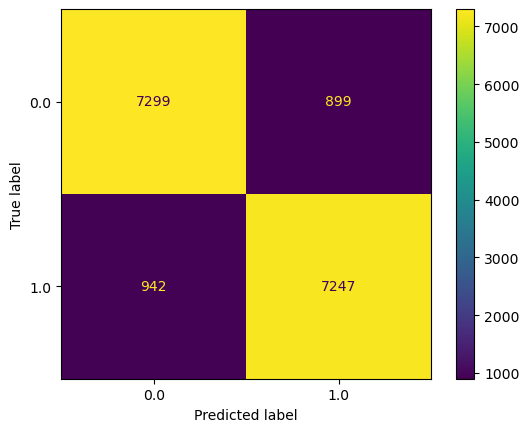

In [41]:
cm = confusion_matrix( y_test_mortalidad_2022,
                       y_test_pred_mortalidad_2022,
                       labels = best_clf.classes_ )

ConfusionMatrixDisplay(cm, display_labels = best_clf.classes_).plot()

plt.show()

In [42]:
y_train_pred = best_clf.predict(X_train_mortalidad_2022)
y_test_pred = best_clf.predict(X_test_mortalidad_2022)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print('El accuracy en train es:', accuracy_score( y_train_mortalidad_2022,
                                                  y_train_pred_mortalidad_2022 ))
print('El accuracy en test es:', accuracy_score( y_test_mortalidad_2022,
                                                 y_test_pred_mortalidad_2022 ))

El accuracy en train es: 0.8913560873545181
El accuracy en test es: 0.8876548483554036


In [45]:
from sklearn import tree

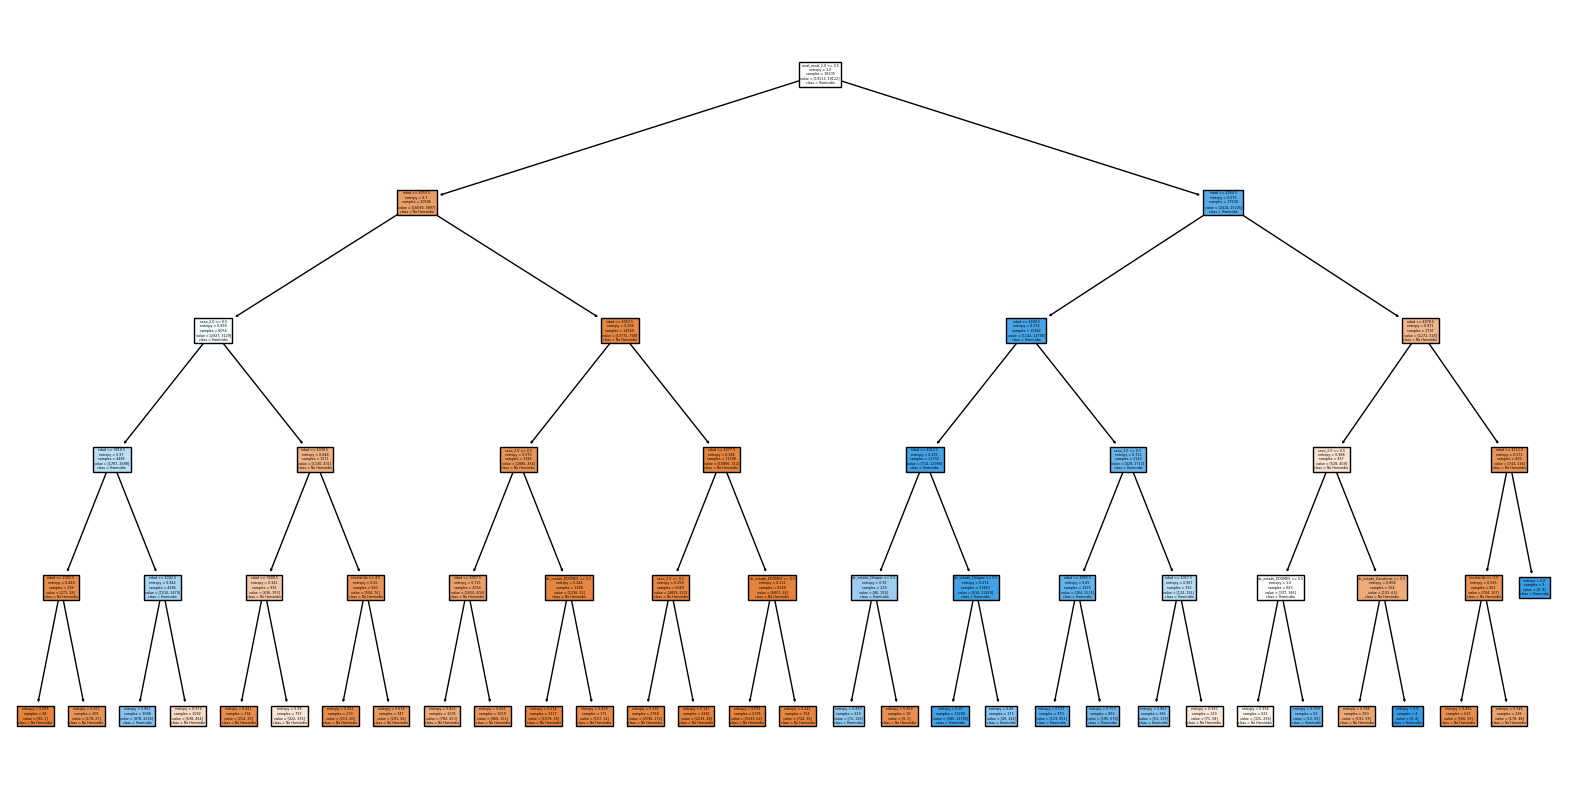

In [47]:
best_clf.fit( X_train_mortalidad_2022, y_train_mortalidad_2022 )

plt.figure( figsize = (20, 10) )  # Esto ajusta el tamaño de la figura para una mejor visualización

tree.plot_tree( best_clf,
                feature_names = X_train_mortalidad_2022.columns,  
                class_names = ['No Homicidio', 'Homicidio'],  
                filled = True )  # Esto colorea los nodos para hacer más fácil la interpretación

plt.show()

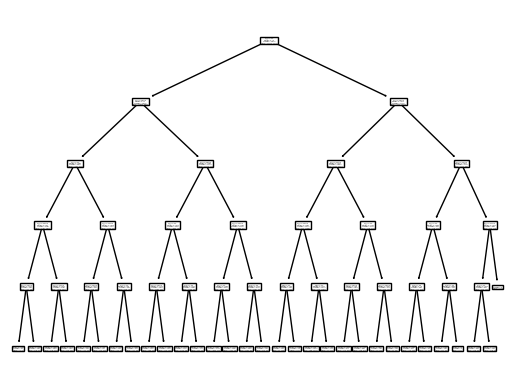

In [48]:
tree.plot_tree(best_clf.fit(X_train_mortalidad_2022, y_train_mortalidad_2022));

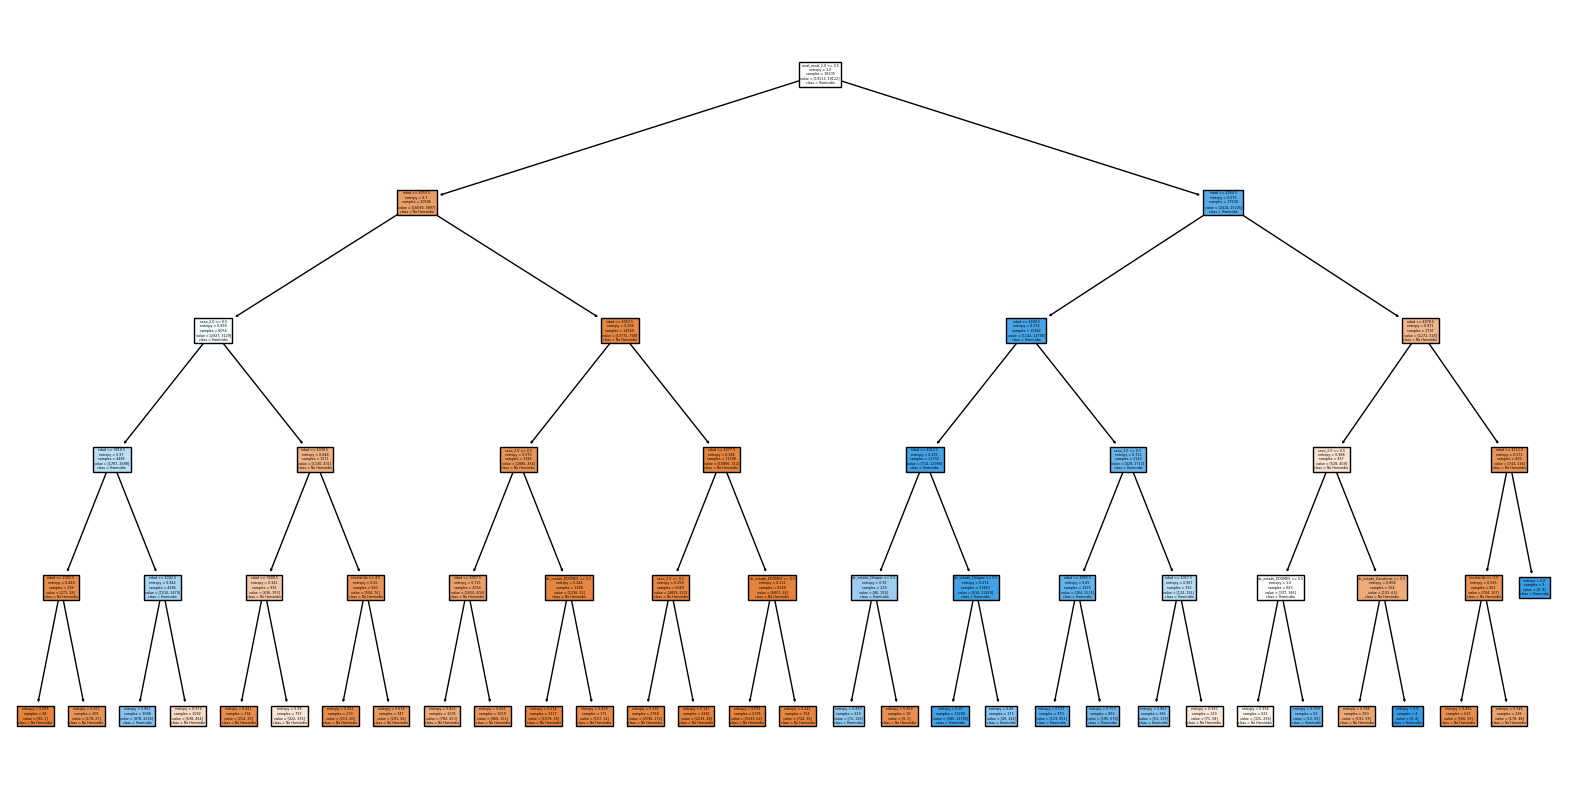

In [49]:
plt.figure( figsize = (20,10) )

tree.plot_tree( best_clf,
                feature_names = X_train_mortalidad_2022.columns, 
                class_names = ['No Homicidio', 'Homicidio'],
                filled = True )  # Esto colorea los nodos para hacer más fácil la interpretación

plt.show()

In [50]:
feature_scores_mortalidad_2022 = pd.DataFrame( pd.Series( grid_search.best_estimator_.feature_importances_, 
                                                  index = X_train_mortalidad_2022.columns).sort_values(ascending = False)).T

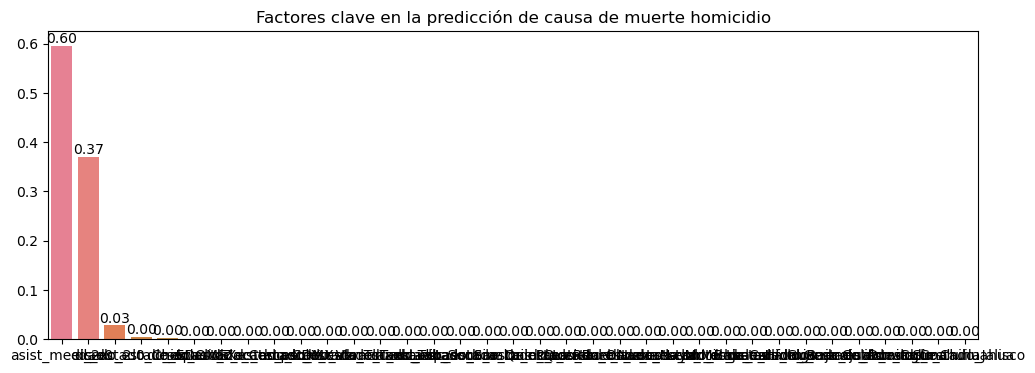

In [51]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_mortalidad_2022)

for index, value in enumerate(feature_scores_mortalidad_2022.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de causa de muerte homicidio")
plt.show()